In [1]:
import sys
sys.path.append('../')
import giancarlo as gc

In [2]:
a = gc.Symbol('a')
b = gc.Symbol('b')
a*b + b*a

( a\,b + b\,a )

In [3]:
phi, phidag = gc.ScalarField(r'\phi')

op = lambda x: phidag(x) * phi(x)
expr = op('x') * op('y')

expr.wick()

[giancarlo] :  wick : {'pairs': [(1, 0), (3, 2)], '_tag': ((0, 1), (2, 3)), 'fields': [{\phi}^\dagger(x), \phi(x), {\phi}^\dagger(y), \phi(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 0)], '_tag': ((0, 3), (1, 2)), 'fields': [{\phi}^\dagger(x), \phi(x), {\phi}^\dagger(y), \phi(y)]}


( S_\phi(x, x)\,S_\phi(y, y) + S_\phi(x, y)\,S_\phi(y, x) )

Generate random names for variables. Every time it is called it generates a new name. It is very useful for variables that are summed over

In [4]:
for _ in range(10):
    print(gc.default.var())

x1
x2
x3
x4
x5
x6
x7
x8
x9
x10


In [13]:
Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
e = gc.Symbol('e')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')

def Jgamma(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = Qu * ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = Qd * dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return up + down

def Jp(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return dbar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)

def Jn(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return ubar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)

Jx = Jgamma('x', r'\mu')
Jy = Jgamma('y', r'\nu')

Jx

( Q_u\,\bar{u}(x)\,G(\mu)\,G(\mu)\,u(x) + Q_d\,\bar{d}(x)\,G(\mu)\,G(\mu)\,d(x) )

In [14]:
expr = Jx * Jy
c = expr.wick(trace_indices=['spin'])
c

[giancarlo] :  wick : {'pairs': [(1, 2), (3, 0), (5, 6), (7, 4)], '_tag': ((0, 3), (1, 2), (4, 7), (5, 6)), 'fields': [\bar{u}(x), G(\mu), G(\mu), u(x), \bar{u}(y), G(\nu), G(\nu), u(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 4), (5, 6), (7, 0)], '_tag': ((0, 7), (1, 2), (3, 4), (5, 6)), 'fields': [\bar{u}(x), G(\mu), G(\mu), u(x), \bar{u}(y), G(\nu), G(\nu), u(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 0), (5, 6), (7, 4)], '_tag': ((0, 3), (1, 2), (4, 7), (5, 6)), 'fields': [\bar{u}(x), G(\mu), G(\mu), u(x), \bar{d}(y), G(\nu), G(\nu), d(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 0), (5, 6), (7, 4)], '_tag': ((0, 3), (1, 2), (4, 7), (5, 6)), 'fields': [\bar{d}(x), G(\mu), G(\mu), d(x), \bar{u}(y), G(\nu), G(\nu), u(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 0), (5, 6), (7, 4)], '_tag': ((0, 3), (1, 2), (4, 7), (5, 6)), 'fields': [\bar{d}(x), G(\mu), G(\mu), d(x), \bar{d}(y), G(\nu), G(\nu), d(y)]}
[giancarlo] :  wick : {'pairs': [(1, 2), (3, 4), (5, 6), (7,

( Q_u^2\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_u(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_u(y, y) ] + Q_u^2\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_u(x, y)\,\gamma_{\nu}\,S_u(y, x) ] + Q_u\,Q_d\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_u(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_d(y, y) ] + Q_d\,Q_u\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_d(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_u(y, y) ] + Q_d^2\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_d(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_d(y, y) ] + Q_d^2\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_d(x, y)\,\gamma_{\nu}\,S_d(y, x) ] )

In [15]:
cc = c.replace({'S_u': 'S', 'S_d': 'S'})
for el in cc.elements():
    gc.log(el)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[giancarlo] : ( ( Q_u^2 + Q_u\,Q_d + Q_d\,Q_u + Q_d^2 ) ) * ( \mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] )
[giancarlo] : ( ( Q_u^2 + Q_d^2 ) ) * ( \mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )
{'x': (1.0, 0.0)}
x x
{'y': (1.0, 0.0)}
y y
{'x': (1.0, 0.0), 'y': (-1.0, 1.2246467991473532e-16)}
x y
y x


(None,
 ( ( Q_u^2 + Q_u\,Q_d + Q_d\,Q_u + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( Q_u^2 + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] ))

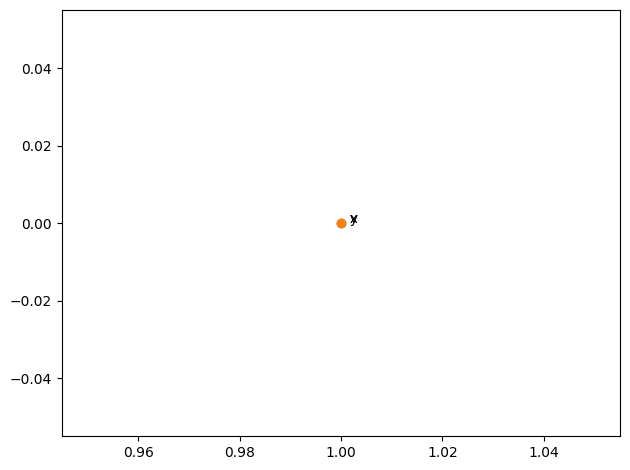

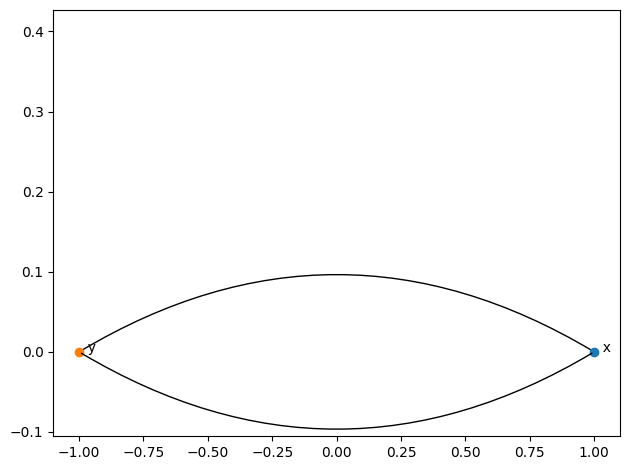

In [16]:
ccc = cc.simplify()
ccc.draw(), ccc

[giancarlo] :  wick : {'pairs': [(1, 2), (3, 4), (5, 6), (7, 0)], '_tag': ((0, 7), (1, 2), (3, 4), (5, 6)), 'fields': [\bar{d}(x), G(\mu), G(\mu), u(x), \bar{u}(y), G(\nu), G(\nu), d(y)]}
{'x': (1.0, 0.0), 'y': (-1.0, 1.2246467991473532e-16)}
x y
y x


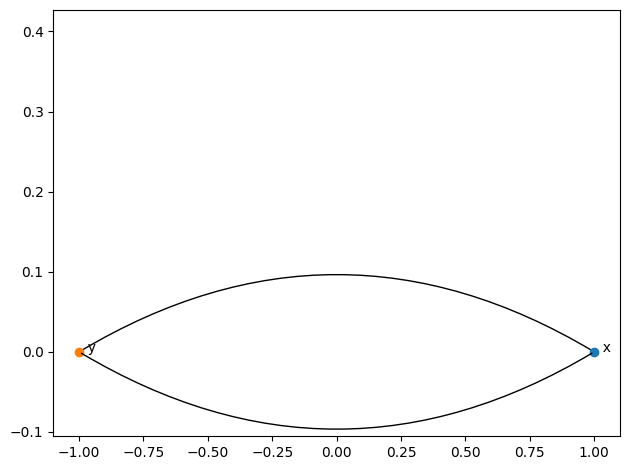

In [9]:
Jx = Jp('x',r'\mu')
Jy = Jn('y',r'\nu')

c = (Jx * Jy).wick(trace_indices=['spin'])

c.draw()

In [10]:
expr = d('z1', 's1') * Jgamma('y2', r'\beta') * Jx * Jgamma('y1',r'\alpha') * ubar('z2','s2')
c = expr.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()

[giancarlo] :  wick : {'pairs': [(0, 5), (2, 3), (4, 1), (6, 7), (8, 9), (10, 11), (12, 13)], '_tag': ((0, 5), (1, 4), (2, 3), (6, 7), (8, 9), (10, 11), (12, 13)), 'fields': [d(z1), \bar{u}(y2), G(\beta), G(\beta), u(y2), \bar{d}(x), G(\mu), G(\mu), u(x), \bar{u}(y1), G(\alpha), G(\alpha), u(y1), \bar{u}(z2)]}
[giancarlo] :  wick : {'pairs': [(0, 5), (2, 3), (4, 1), (6, 7), (8, 13), (10, 11), (12, 9)], '_tag': ((0, 5), (1, 4), (2, 3), (6, 7), (8, 13), (9, 12), (10, 11)), 'fields': [d(z1), \bar{u}(y2), G(\beta), G(\beta), u(y2), \bar{d}(x), G(\mu), G(\mu), u(x), \bar{u}(y1), G(\alpha), G(\alpha), u(y1), \bar{u}(z2)]}
[giancarlo] :  wick : {'pairs': [(0, 5), (2, 3), (4, 9), (6, 7), (8, 1), (10, 11), (12, 13)], '_tag': ((0, 5), (1, 8), (2, 3), (4, 9), (6, 7), (10, 11), (12, 13)), 'fields': [d(z1), \bar{u}(y2), G(\beta), G(\beta), u(y2), \bar{d}(x), G(\mu), G(\mu), u(x), \bar{u}(y1), G(\alpha), G(\alpha), u(y1), \bar{u}(z2)]}
[giancarlo] :  wick : {'pairs': [(0, 5), (2, 3), (4, 9), (6, 7),